# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities


Number of cities in the list: 600


['lensk',
 'lata',
 'waitangi',
 'vernon',
 'port-aux-francais',
 'hakha',
 'grand falls-windsor',
 'afaahiti',
 'constantia',
 'lihue',
 'bredasdorp',
 'bethel',
 'adamstown',
 'ribeira grande',
 'stanley',
 'flin flon',
 'kokopo',
 'chernyshevskiy',
 'howrah',
 'grytviken',
 'kirensk',
 'ust-nera',
 'dakhla',
 'invercargill',
 'broome',
 'klyuchi',
 'tolanaro',
 'puerto natales',
 'malayer',
 'qaqortoq',
 'carnarvon',
 'coahuayana de hidalgo',
 'blackmans bay',
 'al hazm',
 'dhankuta',
 'mount darwin',
 'edinburgh of the seven seas',
 'coquimbo',
 'margaret river',
 'kalmunai',
 'el sauzal de rodriguez',
 'punta arenas',
 'olonkinbyen',
 'katsuren-haebaru',
 'chinde',
 'dunda',
 'bilibino',
 'iqaluit',
 'ushuaia',
 'laguna',
 'guiuan',
 'wailua homesteads',
 'rosarito',
 'utrik',
 'tsukumiura',
 'sultanah',
 'georgetown',
 'albany',
 'hithadhoo',
 'yellowknife',
 'xining',
 'carbonear',
 'bovec',
 'santa marta',
 'hawaiian paradise park',
 'badger',
 'tchintabaraden',
 'nova sintra',

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"q={city}&appid={weather_api_key}"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url+city_url).json()      

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lensk
Processing Record 2 of Set 1 | lata
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | vernon
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | hakha
Processing Record 7 of Set 1 | grand falls-windsor
Processing Record 8 of Set 1 | afaahiti
Processing Record 9 of Set 1 | constantia
Processing Record 10 of Set 1 | lihue
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | flin flon
Processing Record 17 of Set 1 | kokopo
Processing Record 18 of Set 1 | chernyshevskiy
Processing Record 19 of Set 1 | howrah
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | kirensk
Processing Record 22 of Set 1 | ust-nera
Processing Record 23 of Set 1 |

Processing Record 40 of Set 4 | alto piquiri
Processing Record 41 of Set 4 | buta
Processing Record 42 of Set 4 | lipljan
Processing Record 43 of Set 4 | bahua
Processing Record 44 of Set 4 | ertil'
Processing Record 45 of Set 4 | cole harbour
Processing Record 46 of Set 4 | avarua
Processing Record 47 of Set 4 | nangong
Processing Record 48 of Set 4 | villaguay
Processing Record 49 of Set 4 | puqi
Processing Record 0 of Set 5 | halifax
Processing Record 1 of Set 5 | palmares do sul
Processing Record 2 of Set 5 | ahau
City not found. Skipping...
Processing Record 3 of Set 5 | yuzhno-kurilsk
Processing Record 4 of Set 5 | bam
Processing Record 5 of Set 5 | taki
Processing Record 6 of Set 5 | itoman
Processing Record 7 of Set 5 | boa vista
Processing Record 8 of Set 5 | santa vitoria do palmar
Processing Record 9 of Set 5 | pavlovka
Processing Record 10 of Set 5 | zhanaozen
Processing Record 11 of Set 5 | luderitz
Processing Record 12 of Set 5 | fale old settlement
Processing Record 13 o

Processing Record 29 of Set 8 | daltonganj
Processing Record 30 of Set 8 | khuzdar
Processing Record 31 of Set 8 | east london
Processing Record 32 of Set 8 | vokhtoga
Processing Record 33 of Set 8 | qal'at bishah
City not found. Skipping...
Processing Record 34 of Set 8 | kingston
Processing Record 35 of Set 8 | champerico
Processing Record 36 of Set 8 | kulia village
City not found. Skipping...
Processing Record 37 of Set 8 | apodi
Processing Record 38 of Set 8 | ribas do rio pardo
Processing Record 39 of Set 8 | saldanha
Processing Record 40 of Set 8 | oranjemund
Processing Record 41 of Set 8 | hobyo
Processing Record 42 of Set 8 | santa elena de uairen
Processing Record 43 of Set 8 | keren
Processing Record 44 of Set 8 | crane
Processing Record 45 of Set 8 | rawson
Processing Record 46 of Set 8 | clarinda
Processing Record 47 of Set 8 | broken hill
Processing Record 48 of Set 8 | peniche
Processing Record 49 of Set 8 | flying fish cove
Processing Record 0 of Set 9 | la ronge
Proces

Processing Record 15 of Set 12 | jiaojiang
Processing Record 16 of Set 12 | ingeniero jacobacci
Processing Record 17 of Set 12 | gejiu
Processing Record 18 of Set 12 | devils lake
Processing Record 19 of Set 12 | verkhniye sergi
Processing Record 20 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 21 of Set 12 | clinton
Processing Record 22 of Set 12 | cidreira
Processing Record 23 of Set 12 | meadow lakes
Processing Record 24 of Set 12 | kristiansund
Processing Record 25 of Set 12 | kavaratti
Processing Record 26 of Set 12 | road town
Processing Record 27 of Set 12 | chos malal
Processing Record 28 of Set 12 | la'ie
Processing Record 29 of Set 12 | dudinka
Processing Record 30 of Set 12 | san luis de la loma
Processing Record 31 of Set 12 | upata
Processing Record 32 of Set 12 | tocopilla
Processing Record 33 of Set 12 | al bayda'
Processing Record 34 of Set 12 | jawf al maqbabah
Processing Record 35 of Set 12 | bakal
Processing Record 36 of Set 12 | manismata
Proc

In [4]:
city_weather


{'coord': {'lon': -2.0667, 'lat': 46.7833},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 294.47,
  'feels_like': 294.25,
  'temp_min': 294.47,
  'temp_max': 294.47,
  'pressure': 1017,
  'humidity': 61,
  'sea_level': 1017,
  'grnd_level': 1016},
 'visibility': 10000,
 'wind': {'speed': 4.55, 'deg': 44, 'gust': 5.74},
 'clouds': {'all': 34},
 'dt': 1685958644,
 'sys': {'country': 'FR', 'sunrise': 1685938576, 'sunset': 1685995046},
 'timezone': 7200,
 'id': 6445205,
 'name': 'Saint-Jean-de-Monts',
 'cod': 200}

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lensk,60.7253,114.9278,289.07,38,94,1.81,RU,1685958515
1,lata,40.1629,-8.3327,299.53,49,30,1.13,PT,1685958516
2,waitangi,-43.9535,-176.5597,281.94,90,59,8.93,NZ,1685958516
3,vernon,50.2581,-119.2691,285.79,41,0,1.03,CA,1685958516
4,port-aux-francais,-49.3500,70.2167,281.00,88,90,17.81,TF,1685958516


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lensk,60.7253,114.9278,289.07,38,94,1.81,RU,1685958515
1,lata,40.1629,-8.3327,299.53,49,30,1.13,PT,1685958516
2,waitangi,-43.9535,-176.5597,281.94,90,59,8.93,NZ,1685958516
3,vernon,50.2581,-119.2691,285.79,41,0,1.03,CA,1685958516
4,port-aux-francais,-49.3500,70.2167,281.00,88,90,17.81,TF,1685958516


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

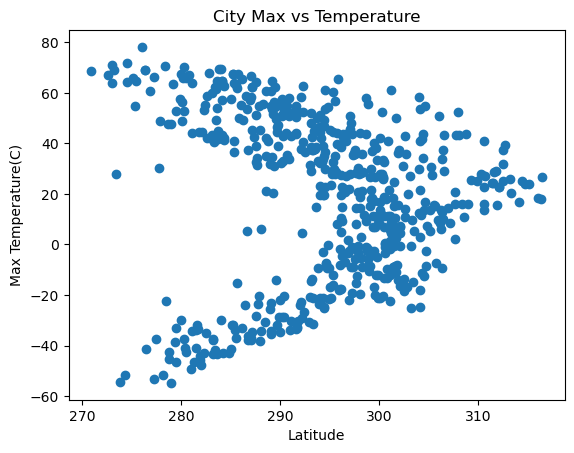

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.title("City Max vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

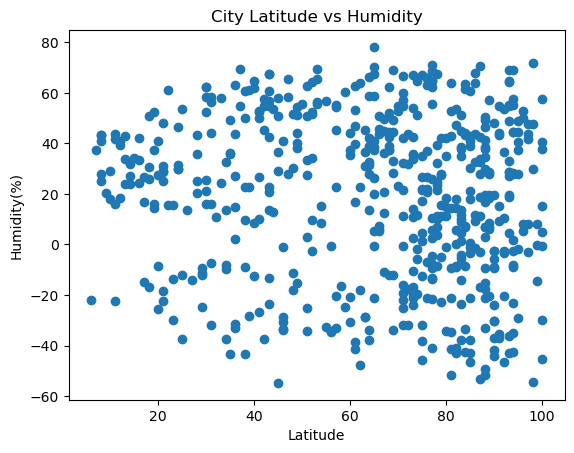

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

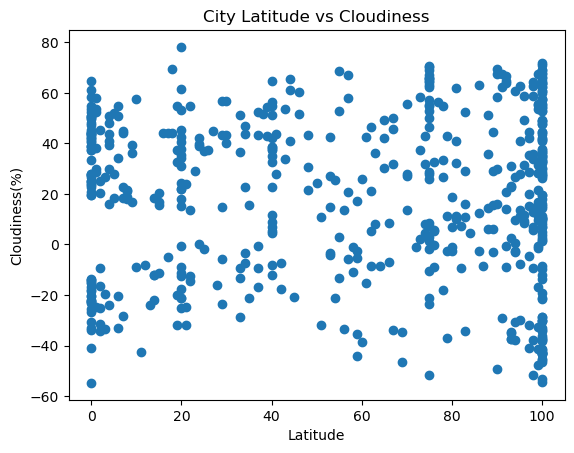

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

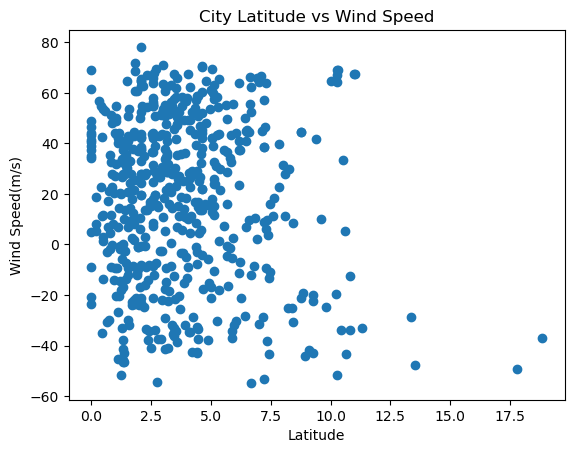

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regress(x_values, y_values,y_name,equation_coordinates):
   
   (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

   # To get regression values
   regress_values = x_values * slope + intercept

   # Create line equation string
   line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2)) 
   plt.scatter(x_values,y_values)
   plt.plot(x_values,regress_values , "r-") 
   plt.annotate(line_eq, equation_coordinates, fontsize=15, color="red")                
   plt.xlabel("Lat") 
   plt.ylabel(y_name) 
   print(f"the r-value is :{rvalue**2}")
   plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lensk,60.7253,114.9278,289.07,38,94,1.81,RU,1685958515
1,lata,40.1629,-8.3327,299.53,49,30,1.13,PT,1685958516
3,vernon,50.2581,-119.2691,285.79,41,0,1.03,CA,1685958516
5,hakha,22.6500,93.6167,294.55,62,93,0.39,MM,1685958517
6,grand falls-windsor,48.9332,-55.6649,277.87,95,100,1.04,CA,1685958517


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,281.94,90,59,8.93,NZ,1685958516
4,port-aux-francais,-49.3500,70.2167,281.00,88,90,17.81,TF,1685958516
7,afaahiti,-17.7500,-149.2833,296.08,72,42,4.69,PF,1685958517
10,bredasdorp,-34.5322,20.0403,287.20,56,93,4.10,ZA,1685958518
12,adamstown,-25.0660,-130.1015,294.43,71,2,8.38,PN,1685958518


###  Temperature vs. Latitude Linear Regression Plot

the r-value is :0.4340881444737878


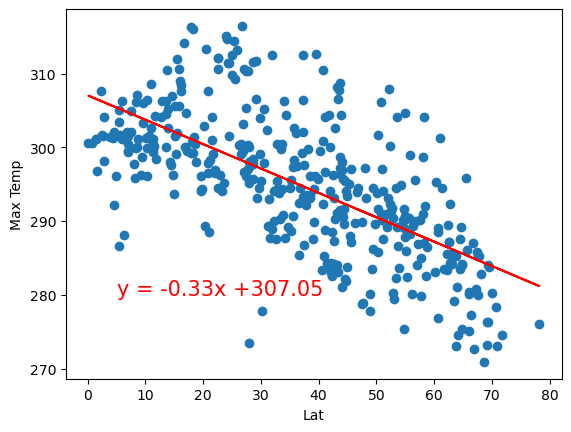

In [16]:
# Linear regression on Northern Hemisphere

x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Max Temp"]
linear_regress(x_values, y_values,"Max Temp",(5, 280))


the r-value is :0.7089110991922667


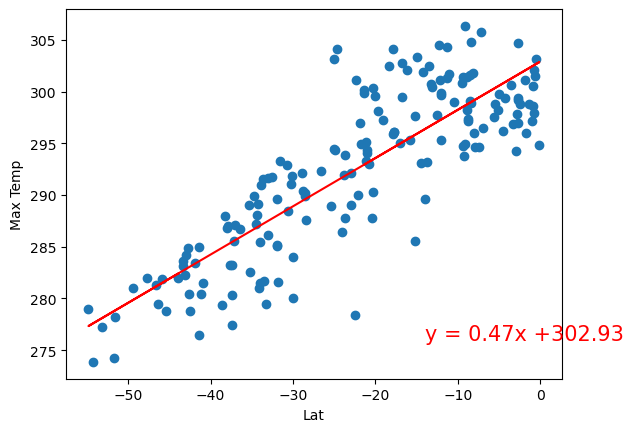

In [17]:
# Linear regression on Southern Hemisphere

x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]
linear_regress(x_values, y_values,"Max Temp",(-14, 276))

The linear relationship between Temperature and Latitude

There is a mid positive correlation between temperature and latitude,
with a correlation coefficient of 0.4340881444737878 on Northern Hemisphere.

There is a strong positive correlation between temperature and latitude,
with a correlation coefficient of 0.7089110991922667 on Southern Hemisphere.


### Humidity vs. Latitude Linear Regression Plot

the r-value is :0.0024896301472889237


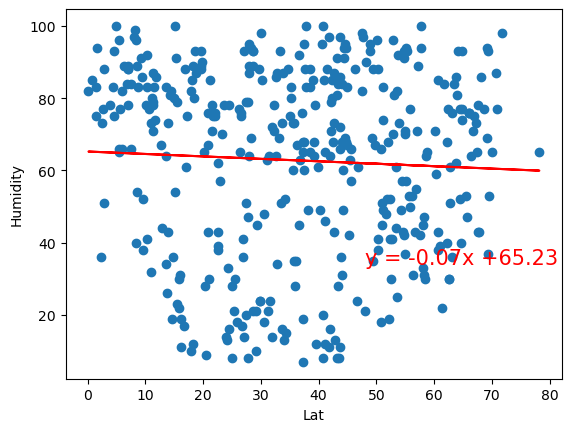

In [18]:
# Northern Hemisphere

x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Humidity"]
linear_regress(x_values, y_values,"Humidity",(48,34))


the r-value is :6.076229761682668e-05


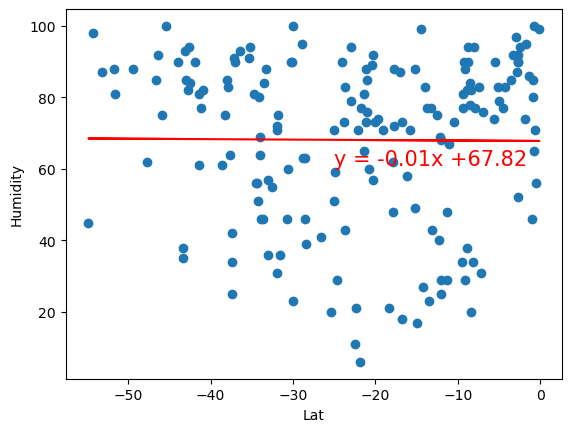

In [19]:
# Southern Hemisphere

x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Humidity"]
linear_regress(x_values, y_values,"Humidity",(-25,61))

The linear relationship between Humidity and Latitude

There is a relatively no correlation between humidity and latitude,
with a correlation coefficient of 0.0024896301472889237 on Northern Hemisphere.

There is a almost no correlation between humidity and latitude,
with a correlation coefficient of 6.076229761682668e-05 on Southern Hemisphere.


### Cloudiness vs. Latitude Linear Regression Plot

the r-value is :0.0018391984789917785


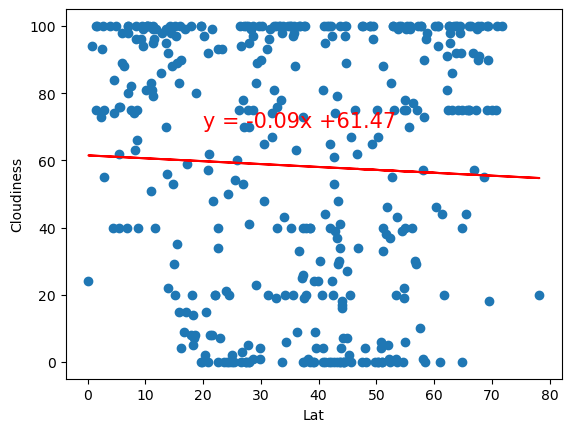

In [20]:
# Northern Hemisphere

x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Cloudiness"]
linear_regress(x_values, y_values,"Cloudiness",(20,70))

the r-value is :0.04903735311842561


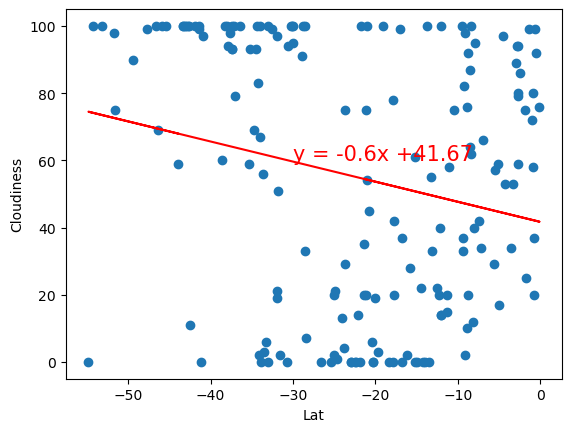

In [21]:
# Southern Hemisphere

x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Cloudiness"]
linear_regress(x_values, y_values,"Cloudiness",(-30,60))

The linear relationship between Cloudiness and Latitude

There is no significant correlation between Cloudiness and latitude,
with a correlation coefficient of 0.0018391984789917785
 on Northern Hemisphere.

There is no significant correlation between Cloudiness and latitude,
with a correlation coefficient of 0.04903735311842561 on Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is :0.011285396235293423


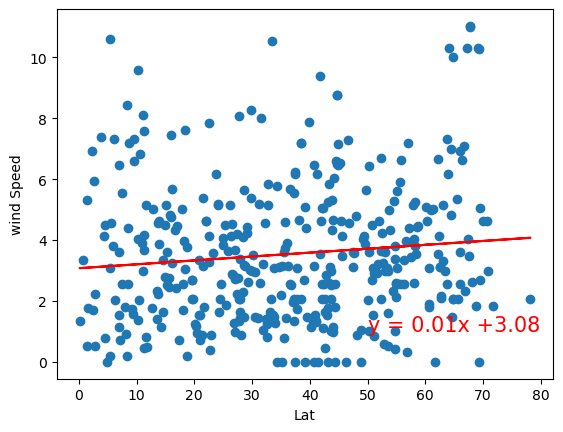

In [22]:
# Northern Hemisphere

x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Wind Speed"]
linear_regress(x_values, y_values,"wind Speed",(50,1.00))

the r-value is :0.08100064564221847


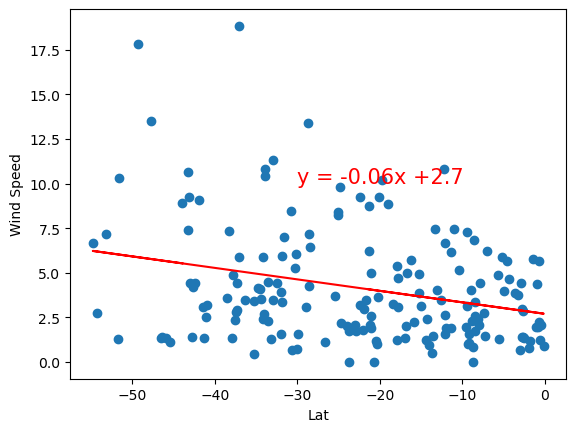

In [23]:
# Southern Hemisphere

x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Wind Speed"]
linear_regress(x_values, y_values,"Wind Speed",(-30,10.0))

The linear relationship between Wind Speed and Latitude

There is no significant correlation between wind speed and latitude,
with a correlation coefficient of 0.011285396235293423 on Northern Hemisphere.

There is no significant correlation between wind speed and latitude,
with a correlation coefficient of 0.08100064564221847 on Southern Hemisphere.